# Neural Network

## Import Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Define activation functions

In [19]:
def identity(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Define output layer

In [20]:
class OutputLayer:
    # n_x: number of inputs
    # n_y: number of outputs
    def __init__(self, n_x: int, n_y: int) -> None:
        self.w = np.random.randn(n_x, n_y)
        self.b = np.random.randn(n_y)

    def forward(self, x: np.ndarray):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = identity(u)
    
    def backward(self, t: np.ndarray):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)

    def update(self, eta: float):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

## Define middle layer

In [21]:
class MiddleLayer:
    # n_x: number of inputs
    # n_y: number of outputs
    def __init__(self, n_x, n_y) -> None:
        self.w = np.random.randn(n_x, n_y)
        self.b = np.random.randn(n_y)

    def forward(self, x: np.ndarray):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = sigmoid(u)

    # grad_y: the gradient from the next layer
    def backward(self, grad_y: np.ndarray):
        delta = grad_y * (1 - self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)

    def update(self, eta: float):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

## Define neural network for classification

In [22]:
class ClassificationNeuralNetwork:
    def __init__(self, n_inp, n_mid, n_out) -> None:
        self.middle_layer = MiddleLayer(n_inp, n_mid)
        self.output_layer = OutputLayer(n_mid, n_out)

    def forward(self, x: np.ndarray):
        self.middle_layer.forward(x)
        self.output_layer.forward(self.middle_layer.y)

    def backward(self, t: np.ndarray):
        self.output_layer.backward(t)
        self.middle_layer.backward(self.output_layer.grad_x)
    
    def update(self, eta: float):
        self.middle_layer.update(eta)
        self.output_layer.update(eta)

## Plotting

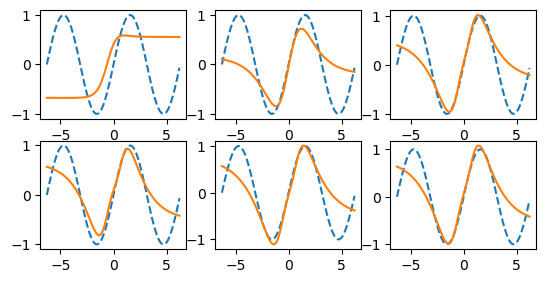

In [36]:
input_data = np.arange(-np.pi, np.pi, 0.1)
test_data = np.arange(-2 * np.pi, 2 * np.pi, 0.1)
correct_data_for_input = np.sin(input_data)
correct_data_for_test = np.sin(test_data)

n_inp = 1
n_mid = 3
n_out = 1

nn = ClassificationNeuralNetwork(n_inp, n_mid, n_out)

eta = 0.1
epochs = 1001
interval = 200

predicted_list = []

for i in range(epochs):
    random_index = np.arange(len(input_data))
    np.random.shuffle(random_index)
    for j in random_index:
        x = input_data[j]
        y = correct_data_for_input[j]
        nn.forward(x.reshape(-1, 1))
        nn.backward(y.reshape(-1, 1))
        nn.update(eta)
    if i % interval == 0:
        predicted = np.array([])
        for j in range(len(test_data)):
            nn.forward(test_data[j].reshape(-1, 1))
            predicted = np.append(predicted, nn.output_layer.y)
        predicted_list.append(predicted)

fig = plt.figure()
for i in range(len(predicted_list)):
    ax = fig.add_subplot(len(predicted_list) // 3 + 1, 3, i + 1)
    ax.plot(test_data, correct_data_for_test, linestyle="dashed")
    ax.plot(test_data, predicted_list[i], linestyle="solid")
plt.show()
